<a href="https://colab.research.google.com/github/Hamiltonfelipe/Hamilton-Felipe/blob/main/Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo


### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [1]:
#!pip install scipy==1.2 --upgrade

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset

In [3]:
Dados= pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [4]:
Dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [5]:
indice={'X': 'temperatura media(c°)','Y':'consumo'}
Dados.rename(columns= indice, inplace=True) #a função rename necessita de um dicionario mapeando os titulos antigos com os q irão os substituir
Dados.head()

,consumo,temperatura media(c°)
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [6]:
Dados.describe()

,consumo,temperatura media(c°)
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<Axes: title={'center': 'Consumo de cerveja (Lts)'}, xlabel='consumo'>

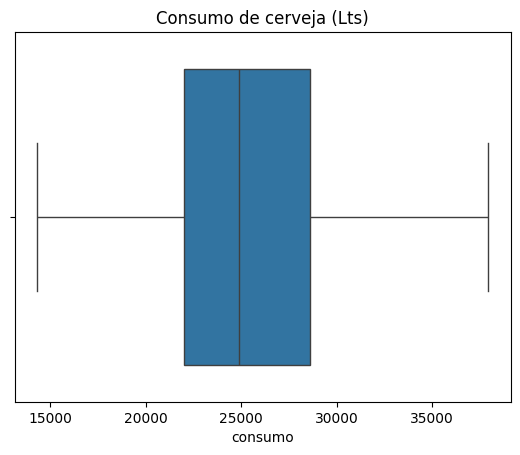

In [7]:
ax=sns.boxplot(data=Dados['consumo'], orient='h')
ax.set_title('Consumo de cerveja (Lts)')
ax

<Axes: title={'center': 'temperatura media(c°)'}, xlabel='temperatura media(c°)'>

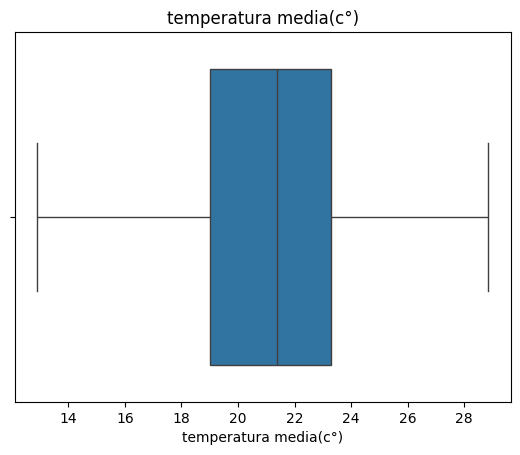

In [8]:
ax=sns.boxplot(data=Dados['temperatura media(c°)'], orient='h')
ax.set_title('temperatura media(c°)')
ax

### Identificando se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

<Axes: title={'center': 'Reta de regressâo: temperatura media(c°) x consumo'}, xlabel='temperatura média(c°)', ylabel='consumo'>

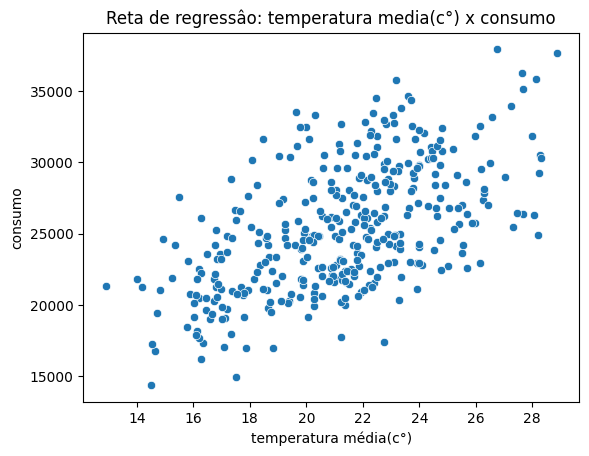

In [9]:
ax= sns.scatterplot(x=Dados['temperatura media(c°)'], y=Dados['consumo'])
ax.set_title('Reta de regressâo: temperatura media(c°) x consumo')
ax.set_ylabel('consumo')
ax.set_xlabel('temperatura média(c°)')
ax
# podemos ver mesmo sem a reta de regressão, vemos q se trata de uma covarância positiva

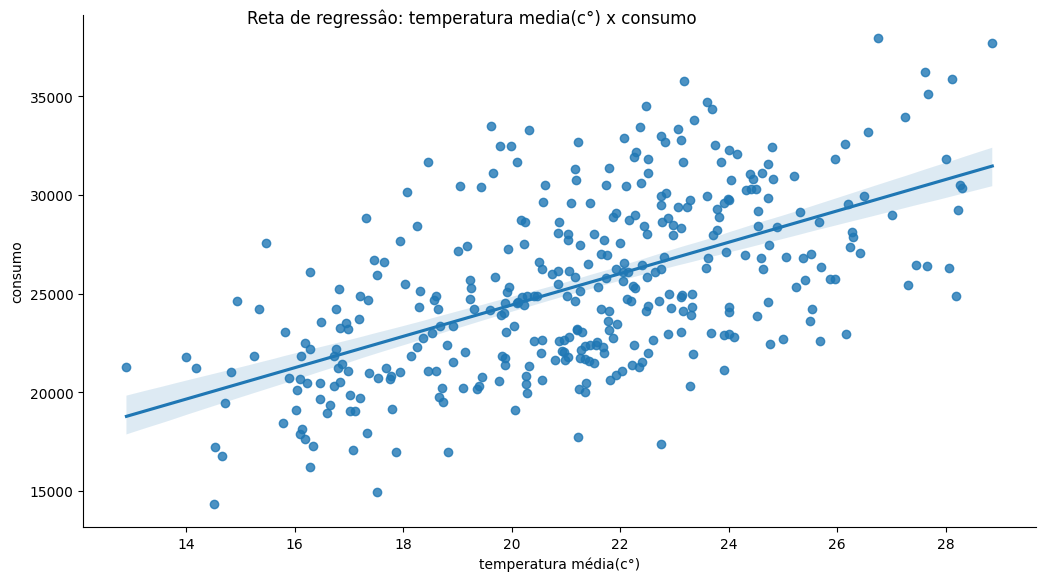

In [10]:
ax= sns.lmplot(x='temperatura media(c°)', y='consumo',data=Dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de regressâo: temperatura media(c°) x consumo')
ax.set_ylabels('consumo')
ax.set_xlabels('temperatura média(c°)')
# e aqui a reta de regressão reforça a nossa hipotése

### <font color='red'>Utilizando a matriz de correlação</font>

In [11]:
Dados.corr()

,consumo,temperatura media(c°)
consumo,1.000000,0.574615
temperatura media(c°),0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: SIM

É possível quantificar a intensidade dessa relação?

Resp.:SIM

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.:NÃO

### Prepare os dados para estimar um modelo de regressão linear simples

In [12]:
import statsmodels.api as sm

In [13]:
Y=Dados['consumo']
X=sm.add_constant(Dados['temperatura media(c°)'])
X.head()

,const,temperatura media(c°)
0,1.0,27.30
1,1.0,27.02
2,1.0,24.82
3,1.0,23.98
4,1.0,23.82


### Estime o modelo de regressão linear simples

In [14]:
resultado= sm.OLS(Y,X).fit()

### Visualize o resultado da regressão

In [15]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.87e-33
Time:                        19:14:38   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8528.90

### Obtenha o $Y$ previsto

In [16]:
Dados['consumo previsto']=resultado.predict()
Dados.head()

,consumo,temperatura media(c°),consumo previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [17]:
resultado.params

,0
const,8528.907284
temperatura media(c°),794.882537


In [18]:
beta_1= resultado.params[0]
beta_2= resultado.params[1]

<ipython-input-18-a55b4bae528a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1= resultado.params[0]
<ipython-input-18-a55b4bae528a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_2= resultado.params[1]


In [19]:
def prever(x):
   return beta_1 + beta_2 * x

In [20]:
resultado.predict([1,42])[0] # parametos são respectivamente: (constante, variávale explicativa)

41913.97383816628

In [21]:
prever(42).round(2)

41913.97

### Obtenha os resíduos da regressão

In [22]:
Dados['residuos'] =resultado.resid

### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<Axes: title={'center': 'Reta de regressão : resíduos x consumo previsto'}, xlabel='consumo previsto (Lts)', ylabel='resíduos'>

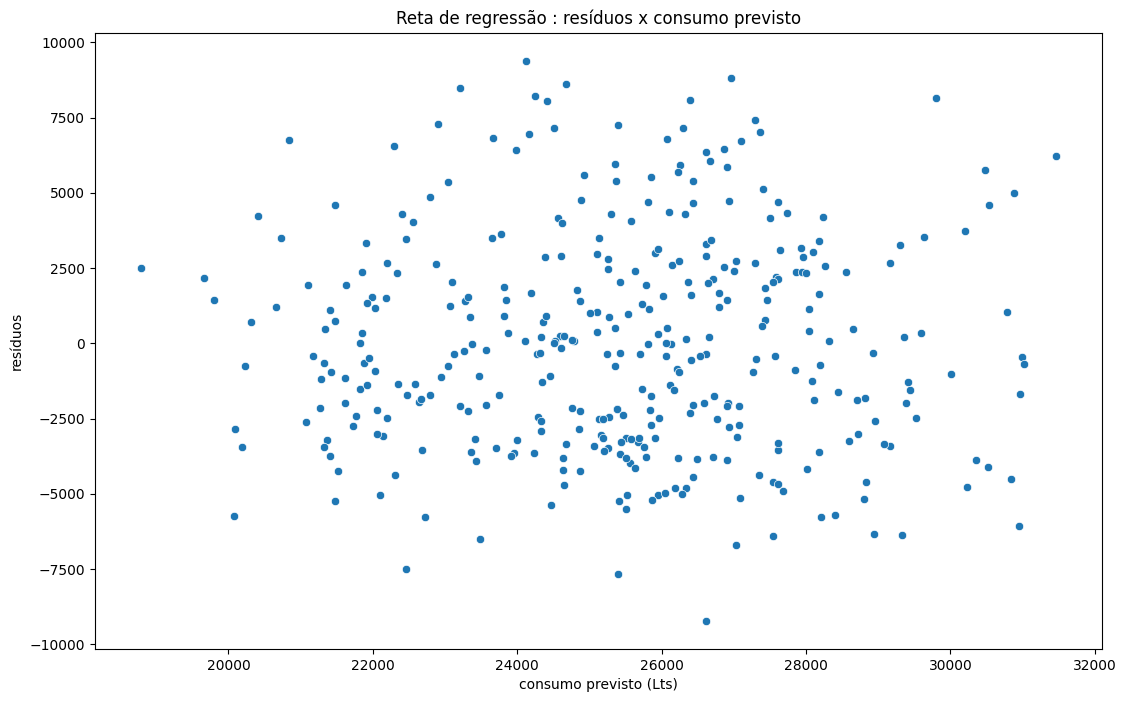

In [23]:
ax=sns.scatterplot(x=Dados['consumo previsto'], y=Dados['residuos'])
ax.figure.set_size_inches(13,8)
ax.set_title('Reta de regressão : resíduos x consumo previsto')
ax.set_xlabel('consumo previsto (Lts)')
ax.set_ylabel('resíduos')
ax
# Não há distribuição logica o q indica q a nosso modelo está certo

In [24]:
Dados.residuos.mean()
# o fato da média dos resíduos ser proximo reforça a nossa ídeia

1.0844166964700778e-11

### Obtenha o QQPlot dos resíduos

In [25]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

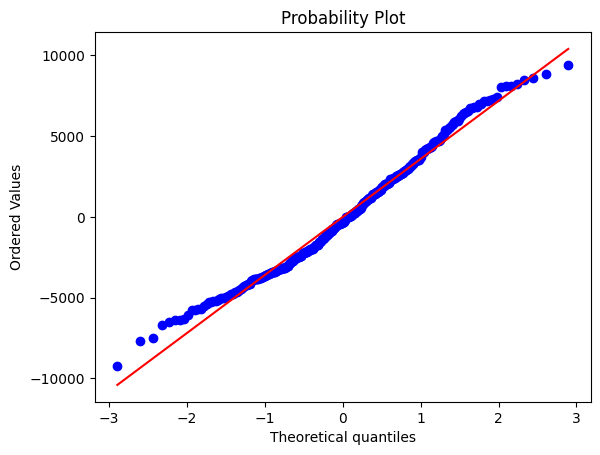

In [26]:
(_,(_,_,_))=probplot(Dados.residuos, plot=plt)

<hr>

<Axes: title={'center': 'Reta de regressão : resíduos x consumo previsto'}, xlabel='consumo previsto (Lts)', ylabel='resíduos'>

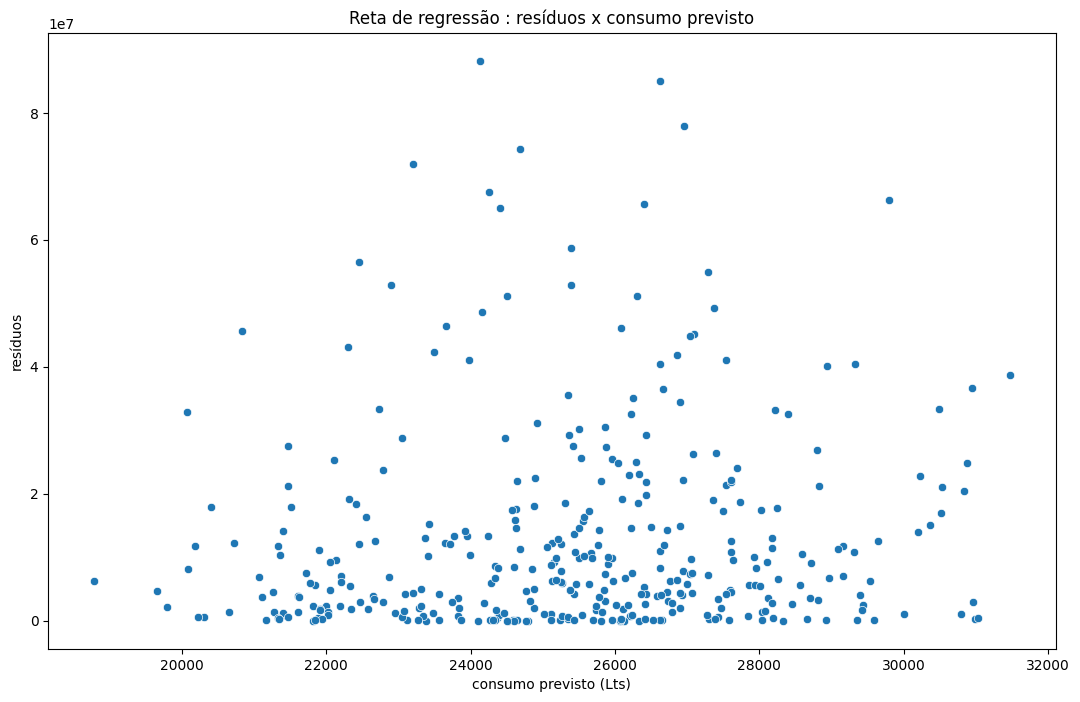

In [27]:
ax=sns.scatterplot(x=Dados['consumo previsto'], y=Dados['residuos']**2)
ax.figure.set_size_inches(13,8)
ax.set_title('Reta de regressão : resíduos x consumo previsto')
ax.set_xlabel('consumo previsto (Lts)')
ax.set_ylabel('resíduos')
ax

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtendo o R² da regressão pelo método da soma dos quadrados



In [28]:
sqr= Dados['consumo previsto'].apply(lambda y:
          (y - Y.mean())**2).sum()
sqr

2325899486.7377872

In [29]:
sqt= Dados.consumo.apply(lambda y:
          (y - Y.mean())**2).sum()
sqt

7044294174.805479

In [30]:
R2= sqr/sqt
R2

0.33018204933243217

In [31]:
resultado.rsquared

0.330182049332432